# News Mood

-...
-...
-...

In [1]:
consumer_key = "r1CGEJjGlrTmuUILfpJOYboYX"
consumer_secret = "PaAN0u5xUEB6FW59ZtQw9DHS95WWj1d9jzchbxXFVGQrGpvA4R"
access_token = "901933530258829312-y9BaHYc1jigRcWrWuGxcs0eYomJMY12"
access_token_secret = "KCSTd4QoPgiPwtYo0MSo185ACE2vPS5WLOrqnAd3xFsxx"

In [2]:
import tweepy
import json
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
tweet_df = pd.DataFrame(columns = ["Source Account", "Tweet Text", "Date", "Tweets Ago", "Compound Sentiment", "Positive Sentiment", "Neutral Sentiment", "Negative Sentiment"])

In [5]:
target_user = ["BBCNews", "CBSNews", "CNN", "FoxNews", "nytimes"]
indexcount = 0
comp_avg = []

In [6]:
for user in target_user:
    public_tweets = api.user_timeline(user, count=100)
    tweetnumber = 0
    comp_list = []
    for tweet in public_tweets:
        search = tweet["text"]
        tweetdate = tweet["created_at"]
        compoundsent = analyzer.polarity_scores(search)["compound"]
        comp_list.append(analyzer.polarity_scores(search)["compound"])
        positivesent = analyzer.polarity_scores(search)["pos"]
        neutralsent = analyzer.polarity_scores(search)["neu"]
        negativesent = analyzer.polarity_scores(search)["neg"]
        tweet_df.set_value(indexcount, "Source Account", user)
        tweet_df.set_value(indexcount, "Tweet Text", search)
        tweet_df.set_value(indexcount, "Date", tweetdate)
        tweet_df.set_value(indexcount, "Tweets Ago", tweetnumber)
        tweet_df.set_value(indexcount, "Compound Sentiment", compoundsent)            
        tweet_df.set_value(indexcount, "Positive Sentiment", positivesent)
        tweet_df.set_value(indexcount, "Neutral Sentiment", neutralsent)
        tweet_df.set_value(indexcount, "Negative Sentiment", negativesent)
        indexcount = indexcount + 1
        tweetnumber = tweetnumber + 1
    comp_avg.append(np.mean(comp_list))

In [7]:
comp_avg

[-0.09639399999999998,
 -0.088402999999999995,
 -0.085370000000000001,
 -0.094389000000000015,
 -0.118765]

In [8]:
tweet_df

,Source Account,Tweet Text,Date,Tweets Ago,Compound Sentiment,Positive Sentiment,Neutral Sentiment,Negative Sentiment
0,BBCNews,Nottingham gas explosion: Two seriously injure...,Wed Sep 20 11:43:52 +0000 2017,0,-0.5267,0,0.532,0.468
1,BBCNews,Olivia and Oliver are top of the list of baby ...,Wed Sep 20 11:35:17 +0000 2017,1,0.5574,0.173,0.827,0
2,BBCNews,Birmingham bin strike halted after court rulin...,Wed Sep 20 11:28:56 +0000 2017,2,-0.128,0,0.824,0.176
3,BBCNews,Warning over food import delays if no Brexit d...,Wed Sep 20 11:14:13 +0000 2017,3,-0.5574,0,0.635,0.365
4,BBCNews,Olivia &amp; Oliver are the most popular 👶 nam...,Wed Sep 20 11:02:41 +0000 2017,4,0.734,0.236,0.764,0
5,BBCNews,Female film casting same as 100 years ago http...,Wed Sep 20 10:52:45 +0000 2017,5,0,0,1,0
6,BBCNews,RT @BBCEngland: The first statue of a woman to...,Wed Sep 20 10:28:44 +0000 2017,6,0,0,1,0
7,BBCNews,Woman held at Heathrow Airport in anti-terrori...,Wed Sep 20 10:26:38 +0000 2017,7,0,0,1,0
8,BBCNews,Euro Parliament negotiator: 'Up to UK to find ...,Wed Sep 20 10:15:25 +0000 2017,8,0.3182,0.187,0.813,0
9,BBCNews,Couple who can't afford their dream wedding as...,Wed Sep 20 10:13:41 +0000 2017,9,-0.2824,0,0.864,0.136


In [9]:
#export to csv for final file

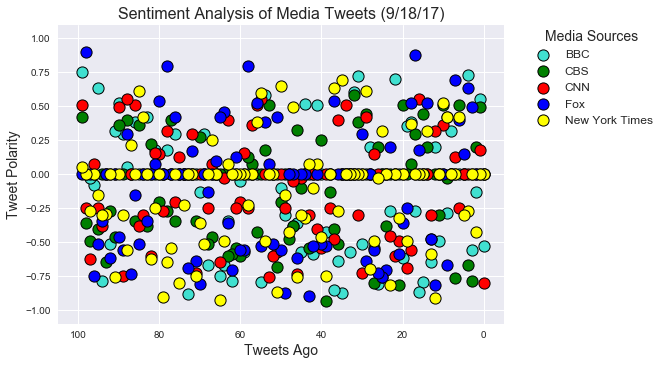

In [10]:
x_axis = (100, 0, 1)
bbcplot = plt.scatter(tweet_df[tweet_df["Source Account"] == "BBCNews"]["Tweets Ago"], tweet_df[tweet_df["Source Account"] == "BBCNews"]["Compound Sentiment"], marker="o", c="turquoise", edgecolors="black", linewidth=1 ,s=125, alpha=1, label="BBC")
cbsplot = plt.scatter(tweet_df[tweet_df["Source Account"] == "CBSNews"]["Tweets Ago"], tweet_df[tweet_df["Source Account"] == "CBSNews"]["Compound Sentiment"], marker="o", facecolors="green", edgecolors="black", linewidth=1, s=125, alpha=1, label="CBS")
cnnplot = plt.scatter(tweet_df[tweet_df["Source Account"] == "CNN"]["Tweets Ago"], tweet_df[tweet_df["Source Account"] == "CNN"]["Compound Sentiment"], marker="o", facecolors="red", edgecolors="black", linewidth=1,s=125, alpha=1, label="CNN")
foxplot = plt.scatter(tweet_df[tweet_df["Source Account"] == "FoxNews"]["Tweets Ago"], tweet_df[tweet_df["Source Account"] == "FoxNews"]["Compound Sentiment"], marker="o", facecolors="blue", edgecolors="black", linewidth=1,s=125, alpha=1, label="Fox")
nytplot = plt.scatter(tweet_df[tweet_df["Source Account"] == "nytimes"]["Tweets Ago"], tweet_df[tweet_df["Source Account"] == "nytimes"]["Compound Sentiment"], marker="o", facecolors="yellow", edgecolors="black", linewidth=1,s=125, alpha=1, label="New York Times")
leg = plt.legend(title="Media Sources",fontsize=12, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(leg.get_title(),fontsize=14)
bbox_inches="tight"
plt.title("Sentiment Analysis of Media Tweets (9/18/17)", fontsize=16)
plt.xlabel("Tweets Ago", fontsize=14)
plt.ylabel("Tweet Polarity", fontsize=14)
plt.ylim(-1.1, 1.1)
plt.xlim(105, -5)
plt.show()

In [11]:
#tweet_df.groupby('Source Account')["Compound Sentiment"].mean()
tweet_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
Source Account        500 non-null object
Tweet Text            500 non-null object
Date                  500 non-null object
Tweets Ago            500 non-null object
Compound Sentiment    500 non-null object
Positive Sentiment    500 non-null object
Neutral Sentiment     500 non-null object
Negative Sentiment    500 non-null object
dtypes: object(8)
memory usage: 55.2+ KB


In [54]:
plt.figure(figsize=(10,7))
x_axis2 = np.arange(len(target_user))

rects1 = plt.bar(0, comp_avg[0], color='turquoise', alpha=1, align="edge", ec="black", width=1)
rects2 = plt.bar(1, comp_avg[1], color='green', alpha=1, align="edge", ec="black", width=1)
rects3 = plt.bar(2, comp_avg[2], color='red', alpha=1, align="edge", ec="black", width=1)
rects4 = plt.bar(3, comp_avg[3], color='blue', alpha=1, align="edge", ec="black", width=1)
rects5 = plt.bar(4, comp_avg[4], color='yellow', alpha=1, align="edge", ec="black", width=1)

tick_locations = [value+0.5 for value in x_axis2]
plt.grid(linestyle="dashed")
plt.xticks(tick_locations, target_user)
plt.xlim(0, 5)
plt.ylim(-.2, .05)

(-0.2, 0.05)

In [55]:
plt.title("Overall Media Sentiment Based on Twitter", fontsize=20)
plt.ylabel("Tweet Polarity")

In [59]:
def autolabel(rects):
    for rect in rects:
        height = np.round(rect.get_height(), decimals=2)
        plt.text(rect.get_x() + rect.get_width()/2., .01*height,
                '%d' % height, 
                ha='center', va='bottom', color='black', fontsize=14)
        
        #np.round(p.get_height(),decimals=2)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

NameError: name 'height' is not defined

<Container object of 1 artists>


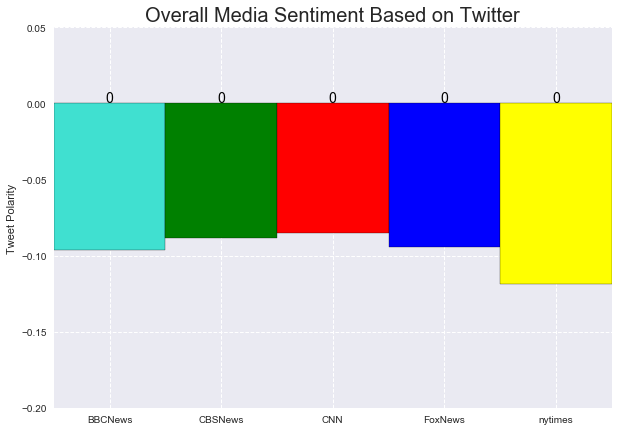

In [57]:
plt.show()